In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_dataset = pd.read_csv('Datasets/VanilaDataset/test_patterns_with_symbols.csv')
train_dataset = pd.read_csv('Datasets/VanilaDataset/train_patterns_with_symbols.csv')

file_path = "Datasets/VanilaDataset"
train_dataset_processed = pd.read_csv(file_path + "/trainDataset_w_aug.csv", index_col=[0, 1])
test_dataset_processed = pd.read_csv(file_path + "/testDataset_w_aug.csv" , index_col=[0, 1])

# combine the datasets
dataset = pd.concat([train_dataset, test_dataset])
dataset

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,GIS,"Triangle, symmetrical",0,2024-12-18,2025-01-02,Food Processing,15
1,TXN,"Double Top, Adam and Adam",0,2025-01-15,2025-01-23,Semiconductor,8
2,BSET,"Flag, high and tight",1,2020-06-25,2020-08-20,Furn/Home Furnishings,56
3,NOVT,"Double Bottom, Adam and Adam",0,2024-02-21,2024-02-27,Precision Instrument,6
4,IPAR,"Double Bottom, Eve and Adam",0,2024-05-01,2024-05-08,Toiletries/Cosmetics,7
...,...,...,...,...,...,...,...
590,RGLD,"Double Top, Adam and Adam",0,2024-10-21,2024-10-29,Metals and Mining (Div.),8
591,MRK,"Double Bottom, Eve and Adam",0,2024-08-07,2024-08-14,Drug,7
592,IRM,"Double Bottom, Adam and Adam",0,2025-01-28,2025-02-03,Industrial Services,6
593,CBT,"Double Top, Adam and Adam",0,2024-11-25,2024-12-04,Chemical (Diversified),9


In [3]:
# sort by Start 
dataset = dataset.sort_values(by='Start')
dataset.reset_index(drop=True, inplace=True)
# coonvert Start and End to datetime
dataset['Start'] = pd.to_datetime(dataset['Start'])
dataset['End'] = pd.to_datetime(dataset['End'])
dataset

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,SKF,"Double Bottom, Adam and Adam",0,2012-09-14,2012-10-18,Short ETFs,34
1,GIS,"Triangle, symmetrical",1,2019-10-10,2020-01-09,Food Processing,91
2,OMC,Head-and-shoulders top,-1,2019-11-08,2020-01-21,Advertising,74
3,WIRE,"Triangle, symmetrical",1,2019-11-11,2020-01-09,Metals and Mining (Div.),59
4,AIG,"Triangle, symmetrical",1,2019-11-25,2020-01-07,Insurance (Prop/Casualty),43
...,...,...,...,...,...,...,...
2968,ITW,Head-and-shoulders top,0,2025-01-21,2025-01-31,Metal Fabricating,10
2969,HNI,"Double Top, Adam and Adam",0,2025-01-21,2025-01-27,Furn/Home Furnishings,6
2970,IPI,"Double Top, Adam and Adam",0,2025-01-22,2025-02-03,Chemical (Diversified),12
2971,CMI,"Double Bottom, Adam and Adam",0,2025-01-27,2025-02-03,Machinery,7


In [4]:
# get a list of all the unique symbols
symbols = dataset['Symbol'].unique()
symbols

array(['SKF', 'GIS', 'OMC', 'WIRE', 'AIG', 'EVH', 'CNA', 'PCG', 'SUM',
       'ORI', 'LH', 'BBW', 'CENX', 'CIEN', 'LUV', 'TZOO', 'ERA', 'ACN',
       'FLS', 'HQY', 'TPX', 'K', 'EIX', 'KALU', 'IBP', 'SLCA', 'CF',
       'SCCO', 'ABT', 'MRO', 'LAWS', 'SSYS', 'BLDR', 'STMP', 'ALRM',
       'AEIS', 'HBI', 'SXI', 'CBT', 'GNW', 'BERY', 'PG', 'CTSH', 'ABC',
       'EQT', 'TFX', 'NI', 'FRD', 'PTEN', 'CLNE', 'SRE', 'FTNT', 'APD',
       'FIVN', 'DDD', 'GPRO', 'TPR', 'EXC', 'RNG', 'PRU', 'AXP', 'APA',
       'BOOT', 'ASH', 'ASGN', 'CROX', 'LEG', 'GE', 'CAL', 'WSM', 'HOV',
       'AWI', 'LEN', 'TEVA', 'OXY', 'VLO', 'HSY', 'EOG', 'MUR', 'AGO',
       'COP', 'MDC', 'HSIC', 'PNW', 'DHI', 'TOL', 'DVN', 'ADTN', 'HOLX',
       'BSET', 'CLS', 'PETS', 'NUS', 'MDT', 'DECK', 'NSP', 'COTY', 'POL',
       'AYI', 'NVDA', 'EMR', 'MTRN', 'APOG', 'AMWD', 'BA', 'FCX', 'TREX',
       'AEL', 'DFS', 'KBH', 'PATK', 'HL', 'MHO', 'LOW', 'OLN', 'WMB',
       'AXDX', 'OMCL', 'OUT', 'SMG', 'LAMR', 'MTSI', 'BECN', 'VFC', '

# Creating a Dataset with Lable less segments


In [5]:
from tqdm import tqdm

num_of_unlabled_seg =50000
# Set a common random seed
SEED = 69
np.random.seed(SEED)

no_pattern_rows = []

with tqdm(total=num_of_unlabled_seg, desc="Processing Segments") as pbar:
    while num_of_unlabled_seg > 0:
        # get a random symbol from the list of symbols
        random_symbol = np.random.choice(symbols)
        # get the dataset for the random symbol
        symbol_dataset = dataset[dataset['Symbol'] == random_symbol]
        if(len(symbol_dataset)>1):
            # get a random index from the symbol dataset
            random_index = np.random.randint(0, len(symbol_dataset)-1)
            # get the random segment
            random_start_segment = symbol_dataset.iloc[random_index]
            random_end_segment = symbol_dataset.iloc[random_index + 1]
            
            # get the date range between the End date of the start segment and the Start date of the end segment
            num_of_dates = random_end_segment['Start'] - random_start_segment['End']
            num_of_dates = num_of_dates.days
            
            if num_of_dates > 10:
                min_start_date = random_start_segment['End']
                max_end_date = random_end_segment['Start']
                
                # print("min_start_date: ", min_start_date , "max_end_date: ", max_end_date,"date len",(max_end_date - min_start_date).days)
                
                # get a random start and end date between the min and max date
                random_start_date_i = np.random.randint(0, num_of_dates-10)
                random_start_date = min_start_date + pd.DateOffset(days=random_start_date_i)
                
                if((num_of_dates+1) -(random_start_date_i) > 100 ):
                    random_end_right_margin = random_start_date_i +100
                else:
                    random_end_right_margin = num_of_dates+1
                
                random_end_date_i = np.random.randint(random_start_date_i +10, random_end_right_margin)
                random_end_date = min_start_date + pd.DateOffset(days=random_end_date_i)
                
                # print("random_start_date: ", random_start_date , "random_end_date: ", random_end_date,"date len",(random_end_date - random_start_date).days)

                row = {
                    'Symbol': random_symbol,
                    'Chart Pattern': 'No Pattern',
                    'BullishBearish' : random_start_segment['BullishBearish'],
                    'Start': random_start_date,
                    'End': random_end_date, 
                    'Industry' : random_start_segment['Industry'],   
                    'Pattern_Length' : (random_end_date - random_start_date).days
                }
                
                no_pattern_rows.append(row)
                num_of_unlabled_seg -= 1
                pbar.update(1)

no_pattern_df = pd.DataFrame(no_pattern_rows)

Processing Segments:  19%|█▊        | 9280/50000 [00:07<00:33, 1218.03it/s]


KeyboardInterrupt: 

In [ ]:
no_pattern_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,DDD,No Pattern,1,2023-09-30,2023-10-21,Electronics,21
1,XLK,No Pattern,0,2022-11-26,2022-12-15,IT Services,19
2,SIGI,No Pattern,-1,2023-07-25,2023-10-31,Insurance (Prop/Casualty),98
3,FMC,No Pattern,0,2023-01-13,2023-01-26,Chemical (Basic),13
4,KFRC,No Pattern,1,2022-05-24,2022-07-12,Human Resources,49
...,...,...,...,...,...,...,...
9995,NEE,No Pattern,0,2023-01-20,2023-02-01,Electric Utility (East),12
9996,BSET,No Pattern,1,2020-04-12,2020-05-17,Furn/Home Furnishings,35
9997,LEG,No Pattern,1,2022-06-02,2022-06-16,Furn/Home Furnishings,14
9998,RTX,No Pattern,0,2022-04-21,2022-06-03,Aerospace/Defense,43


In [ ]:
from utils.formatAndPreprocess import dataset_format

#  create formatted data set for the train and test data
no_pattern_dataset,instance_index_mapping = dataset_format(no_pattern_df,give_instance_index_mapping=True)
no_pattern_dataset , instance_index_mapping

Processing 10000 tasks in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 7760 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:    7.8s finished


Total tasks: 10000, Successful: 9852
Instance counter final value: 9852
Number of successful instances: 9852


e:\FYP\Candlestick-Chart-Pattern-Detection-FYP\utils\formatAndPreprocess.py:213: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
0        0     0.792869  0.902094  0.599321  0.820600  0.828715        8
         1     0.789474  0.919072  0.665535  0.873797  0.508270        8
         2     0.911715  1.000000  0.702320  0.784946  0.315290        8
         3     0.782683  0.904924  0.701755  0.783249  0.226518        8
         4     0.945105  0.975099  0.848897  0.950198  0.219154        8
...                 ...       ...       ...       ...       ...      ...
9851     36    0.443405  0.572498  0.376053  0.538821  0.677343        8
         37    0.532273  0.629561  0.503274  0.604303  0.121228        8
         38    0.524789  0.542563  0.386343  0.397568  0.093700        8
         39    0.384471  0.448082  0.348924  0.377923  0.258073        8
         40    0.443405  0.495791  0.270346  0.333957  0.459502        8

[264711 rows x 6 columns]

In [ ]:
train_dataset_processed

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0
...                 ...       ...       ...       ...       ...      ...
7145     1     0.393576  0.755020  0.383535  0.674699  0.115707        4
         2     0.706829  0.921687  0.558233  0.805220  0.873672        4
         3     0.548192  0.618475  0.341365  0.495985  1.000000        4
         4     0.889561  1.000000  0.152609  0.439760  0.206260        4
         5     0.259038  0.546185  0.054218  0.516066  0.000000        4

[227763 rows x 6 columns]

In [ ]:
train_dataset_processed_copy = train_dataset_processed.copy()
# make a new column with the same values as the Instance index(Level 0) values
train_dataset_processed_copy['Instance'] = train_dataset_processed_copy.index.get_level_values(0)
train_dataset_processed_copy

Open      High       Low     Close    Volume  Pattern  \
Instance Time                                                              
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0   
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0   
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0   
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0   
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0   
...                 ...       ...       ...       ...       ...      ...   
7145     1     0.393576  0.755020  0.383535  0.674699  0.115707        4   
         2     0.706829  0.921687  0.558233  0.805220  0.873672        4   
         3     0.548192  0.618475  0.341365  0.495985  1.000000        4   
         4     0.889561  1.000000  0.152609  0.439760  0.206260        4   
         5     0.259038  0.546185  0.054218  0.516066  0.000000        4   

               Instance  
Instance Time            
0        0            0  
         1            0  
         2            0  
         3            0  
         4            0  
...                 ...  
7145     1         7145  
         2         7145  
         3         7145  
         4         7145  
         5         7145  

[227763 rows x 7 columns]

In [ ]:
Instance_Lits = [2,1,0,6406]
# get the data set where the Instance is in the list
train_dataset_processed_copy[train_dataset_processed_copy['Instance'].isin(Instance_Lits)]

Open      High       Low     Close    Volume  Pattern  \
Instance Time                                                              
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0   
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0   
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0   
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0   
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0   
...                 ...       ...       ...       ...       ...      ...   
6406     17    0.393333  0.571111  0.342222  0.342222  0.384150        2   
         18    0.333333  0.333333  0.148889  0.244445  0.511099        2   
         19    0.184444  0.195555  0.000000  0.175555  0.621354        2   
         20    0.175555  0.337778  0.108889  0.224444  0.292057        2   
         21    0.348889  0.473333  0.297778  0.355556  0.929004        2   

               Instance  
Instance Time            
0        0            0  
         1            0  
         2            0  
         3            0  
         4            0  
...                 ...  
6406     17        6406  
         18        6406  
         19        6406  
         20        6406  
         21        6406  

[65 rows x 7 columns]

# PU Bagging Model


In [ ]:
import time
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.rocket import MiniRocketMultivariate
from xgboost import XGBClassifier
from utils.FixedLengthTransformer import FixedLengthTransformer

def train_mini_rcket(X_train,y_train) :
    fl = FixedLengthTransformer(fixed_length=100, fill_value=0)
    mini_rocket = MiniRocketMultivariate(num_kernels=10000 , n_jobs=-1)
    xgbmr = XGBClassifier(
        eval_metric='mlogloss', 
        n_estimators=100,
        device="cuda"
    )

    clf_mini_rocket_xgb = make_pipeline(
        fl,
        mini_rocket,
        xgbmr
    )
    clf_mini_rocket_xgb.fit(X_train, y_train)

    return clf_mini_rocket_xgb

In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# - Create a training set by combining au positive data points With a random 
#   sample from the unlabeled points. With replacement.
# - Build a classifier from this "bootstrap" sample. treating positive and unlabeled 
#   data points as positives and negatives. respectively,
# - Apply the classifier to whatever the unlabeled data points were not included in the 
#   random sample - hereafter called OOB (Out of Bag) points — and record their scores.
# - Repeat the three Steps above many times and finally assign to each point the average 
#   Of OOB scores it has received.

# get the unique value list of level 0 index Instance
unique_unlabeled_instance = no_pattern_dataset.index.get_level_values(0).unique()
# for each data point , keep track of how many times it has ben OOB and the sum of the probabilities assigned to it
oob_no_pattern_df = pd.DataFrame(index=unique_unlabeled_instance, columns=['oob_count', 'oob_sum'])
oob_no_pattern_df['oob_count'] = 0
oob_no_pattern_df['oob_sum'] = 0

n_estimators = 250


# Create a tqdm object and assign it to a variable
progress_bar = tqdm(range(n_estimators), desc="Training Progress", unit="iteration")

for i in progress_bar:
    # get a 20% sample of Instance index from the instance_list_unlabled with replacement 
    sample_train_instances = np.random.choice(unique_unlabeled_instance, size=int(0.2 * len(unique_unlabeled_instance)), replace=True)
    sample_test_instances = unique_unlabeled_instance [~np.isin(unique_unlabeled_instance, sample_train_instances)]
    # get the data set where the Instance is in the list
    sample_train = no_pattern_dataset[no_pattern_dataset.index.get_level_values(0).isin(sample_train_instances)]
    sample_test = no_pattern_dataset[no_pattern_dataset.index.get_level_values(0).isin(sample_test_instances)]

    sample_test = sample_test.copy()  # Make an explicit copy
    sample_test['Instance'] = sample_test.index.get_level_values(0)


    # Extract Instance and Time indices from sample_test
    instance_idx = sample_test.index.get_level_values(0)
    time_idx = sample_test.index.get_level_values(1)

    # Create new Instance index starting from max_instance + 1
    new_instance_idx = pd.factorize(instance_idx)[0]  

    # Reconstruct the MultiIndex with updated Instance indices
    sample_test.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])


    # create a mapping dictionary from the old Instance index to the new Instance index
    test_inst_mapping_dict = dict(zip(new_instance_idx,instance_idx))
    # print(test_inst_mapping_dict)


    # print("Sampek test :",sample_test)
    # print(sample_train)

    # get the  largest Instance index in the train_dataset_processed
    max_instance = train_dataset_processed.index.get_level_values(0).max()

    # Extract Instance and Time indices from sample_train
    instance_idx = sample_train.index.get_level_values(0)
    time_idx = sample_train.index.get_level_values(1)

    # Create new Instance index starting from max_instance + 1
    new_instance_idx = pd.factorize(instance_idx)[0] + max_instance + 1  # Ensure unique new indices

    # Reconstruct the MultiIndex with updated Instance indices
    sample_train.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])



    # print(sample_train.index.get_level_values(0).unique())
    # print(len(sample_train.index.get_level_values(0).unique()))
    # print(sample_train)

    # concatanate the sample with the train_dataset_processed data
    train_data = pd.concat([train_dataset_processed, sample_train])
    X_train = train_data.drop(columns=['Pattern'])
    y_train = train_data.groupby(level=0)['Pattern'].first().to_frame()
    X_test = test_dataset_processed.drop(columns=['Pattern'])
    y_test = test_dataset_processed.groupby(level=0)['Pattern'].first().to_frame()

    mini_rocket_model = train_mini_rcket(X_train,y_train)

    # # get the probabilities of the test data
    # y_test_prob = mini_rocket_model.predict_proba(X_test)
    # y_test_pred = y_test_prob.argmax(axis=1)  
    # test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # # print("Test accuracy for the ",i,"th model: ", test_accuracy)
    
    # # Update the postfix with the previous accuracy
    # progress_bar.set_postfix({"Prev Accuracy": f"{test_accuracy:.4f}" if test_accuracy is not None else "N/A"})

    # get the probabilities of the sample test data
    y_sample_test_prob = mini_rocket_model.predict_proba(sample_test)

    for j in range(0, len(y_sample_test_prob)):
        correct_instance = test_inst_mapping_dict[j]
        # print(y_sample_test_prob[j][7])
        oob_no_pattern_df.loc[correct_instance, 'oob_count'] += 1
        oob_no_pattern_df.loc[correct_instance, 'oob_sum'] += y_sample_test_prob[j][7]
pd.set_option('display.max_rows', None)
oob_no_pattern_df

Training Progress:   0%|          | 0/250 [00:00<?, ?iteration/s]c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
C:\Users\gwiku\AppData\Local\Temp\ipykernel_27720\2484330659.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0001033669468597509' has dtype incompatible with int64, ple

,oob_count,oob_sum
Instance,,
0,210,0.013557
1,205,0.039493
2,194,0.049260
3,204,0.011350
4,203,0.449336
5,211,0.003217
6,207,0.441017
7,213,0.016674
8,205,0.018846


In [ ]:
# remove the row print constrain in pandas 
pd.reset_option('display.max_rows')
oob_no_pattern_df


,oob_count,oob_sum
Instance,,
0,210,0.013557
1,205,0.039493
2,194,0.049260
3,204,0.011350
4,203,0.449336
...,...,...
9847,203,0.014270
9848,193,0.002707
9849,210,0.011266


In [ ]:
# save oob_no_pattern_df to a csv file
oob_no_pattern_df.to_csv('Datasets/VanilaDataset/oob_no_pattern_stats_df.csv')

In [ ]:
# load csv dataset
oob_no_pattern_df = pd.read_csv('Datasets/VanilaDataset/oob_no_pattern_stats_df.csv', index_col=0)
oob_no_pattern_df["Avg_Prob"] = oob_no_pattern_df['oob_sum'] / oob_no_pattern_df['oob_count']
oob_no_pattern_df

,oob_count,oob_sum,Avg_Prob
Instance,,,
0,210,0.013557,0.000065
1,205,0.039493,0.000193
2,194,0.049260,0.000254
3,204,0.011350,0.000056
4,203,0.449336,0.002213
...,...,...,...
9847,203,0.014270,0.000070
9848,193,0.002707,0.000014
9849,210,0.011266,0.000054


In [ ]:
# sort by the average probability column
oob_no_pattern_df = oob_no_pattern_df.sort_values(by='Avg_Prob', ascending=False)
oob_no_pattern_df

,oob_count,oob_sum,Avg_Prob
Instance,,,
4794,201,199.392736,9.920037e-01
959,206,204.346567,9.919736e-01
9639,205,202.640241,9.884890e-01
9369,209,205.695877,9.841908e-01
7490,209,203.244776,9.724630e-01
...,...,...,...
5439,198,0.000123,6.233930e-07
5083,211,0.000120,5.676866e-07
5026,210,0.000118,5.642065e-07


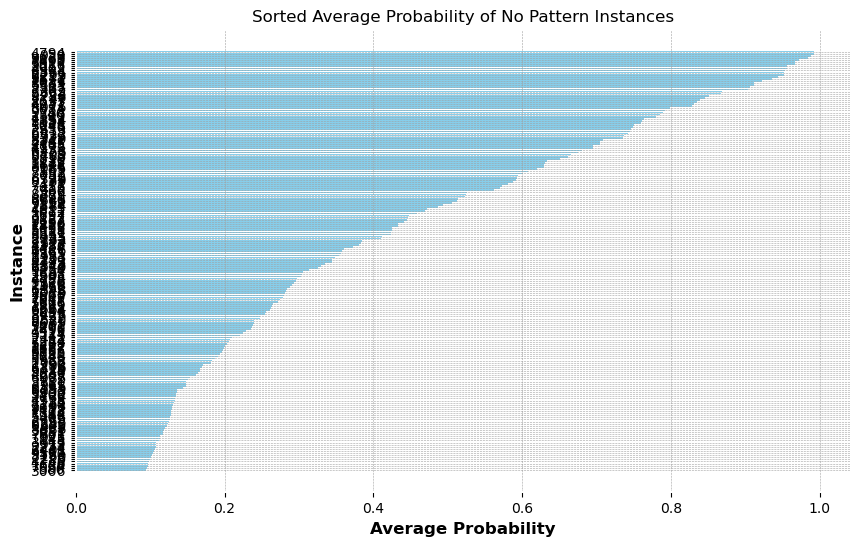

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Avg_Prob' in descending order
sorted_df = oob_no_pattern_df.sort_values(by='Avg_Prob', ascending=False)

# sorted_df equals the data where the 'Avg_Prob' is higher than 0.5
top_instances = sorted_df.head(200)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_instances.index.astype(str), top_instances['Avg_Prob'], color='skyblue')
plt.xlabel('Average Probability')
plt.ylabel('Instance')
plt.title('Sorted Average Probability of No Pattern Instances')

plt.gca().invert_yaxis()  # Invert y-axis to have highest at the top
plt.show()


In [ ]:
# get the top 200 instances with the highest average probability
top_200_instances = sorted_df.head(100)
top_200_instances

,oob_count,oob_sum,Avg_Prob
Instance,,,
4794,201,199.392736,0.992004
959,206,204.346567,0.991974
9639,205,202.640241,0.988489
9369,209,205.695877,0.984191
7490,209,203.244776,0.972463
...,...,...,...
4961,207,74.164775,0.358284
1395,201,71.771512,0.357072
8963,207,73.122045,0.353247


In [ ]:
# get the Level 0 Instance index 917 of no_pattern_dataset 


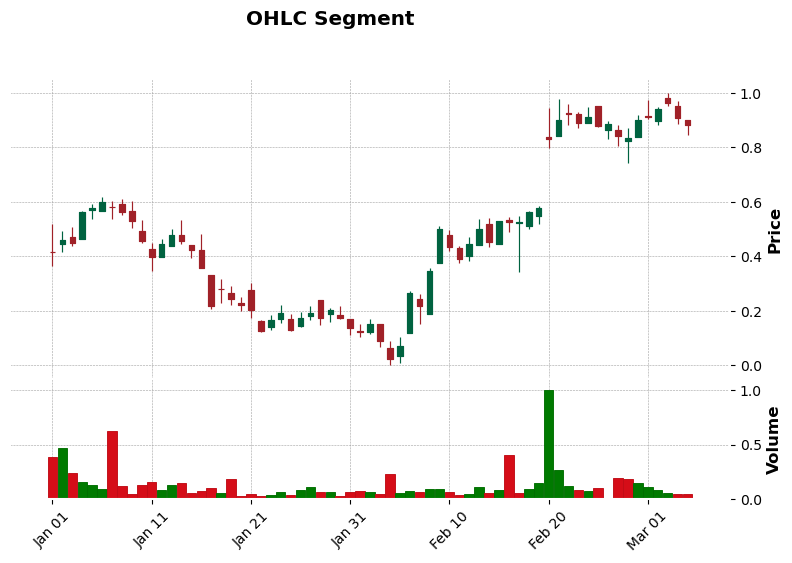

In [ ]:
import pandas as pd
import mplfinance as mpf

def plot_ohlc_segment(data_segment):
    """
    Plots a segment of OHLC data using mplfinance.

    Parameters:
    - data_segment (pd.DataFrame): A DataFrame containing columns ['Open', 'High', 'Low', 'Close', 'Volume']
    """
    # Ensure the DataFrame index is datetime for mplfinance
    data_segment = data_segment.copy()
    data_segment.index = pd.date_range(start='2024-01-01', periods=len(data_segment), freq='D')

    # Plot the candlestick chart
    mpf.plot(data_segment, type='candle', style='charles',
             volume=True, ylabel='Price', ylabel_lower='Volume',
             title="OHLC Segment", figsize=(10, 6))


# Call the function to plot
plot_ohlc_segment(no_pattern_dataset.loc[7490])


In [ ]:
#  get the OHLC data for the top 200 instances
top_200_instances_ohlc = no_pattern_dataset.loc[top_200_instances.index]
top_200_instances_ohlc

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
4794     0     0.604464  0.751956  0.594800  0.705937  0.757134        8
         1     0.679245  0.713069  0.448919  0.479061  0.854090        8
         2     0.455822  0.638288  0.455822  0.599862  0.605851        8
         3     0.637137  0.782098  0.635757  0.667510  0.598090        8
         4     0.730557  0.808559  0.725035  0.757938  0.567881        8
...                 ...       ...       ...       ...       ...      ...
749      51    0.865877  0.911349  0.826901  0.891861  0.091445        8
         52    0.910584  0.930455  0.651509  0.705770  0.071626        8
         53    0.684754  0.794803  0.637753  0.653802  0.076267        8
         54    0.750860  0.753535  0.634696  0.748949  0.074385        8
         55    0.766909  0.806649  0.731754  0.785632  0.087807        8

[6169 rows x 6 columns]

In [ ]:
no_pattern_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,DDD,No Pattern,1,2023-09-30,2023-10-21,Electronics,21
1,XLK,No Pattern,0,2022-11-26,2022-12-15,IT Services,19
2,SIGI,No Pattern,-1,2023-07-25,2023-10-31,Insurance (Prop/Casualty),98
3,FMC,No Pattern,0,2023-01-13,2023-01-26,Chemical (Basic),13
4,KFRC,No Pattern,1,2022-05-24,2022-07-12,Human Resources,49
...,...,...,...,...,...,...,...
9995,NEE,No Pattern,0,2023-01-20,2023-02-01,Electric Utility (East),12
9996,BSET,No Pattern,1,2020-04-12,2020-05-17,Furn/Home Furnishings,35
9997,LEG,No Pattern,1,2022-06-02,2022-06-16,Furn/Home Furnishings,14
9998,RTX,No Pattern,0,2022-04-21,2022-06-03,Aerospace/Defense,43


In [ ]:
# get the no_pattern_df for the top 200 instances
top_200_instances_no_pattern_df = no_pattern_df.loc[top_200_instances.index]
top_200_instances_no_pattern_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
Instance,,,,,,,
4794,RMBS,No Pattern,0,2023-06-13,2023-07-03,Semiconductor Cap Equip.,20
959,D,No Pattern,-1,2021-09-19,2021-10-01,Electric Utility (East),12
9639,AMN,No Pattern,1,2021-04-22,2021-05-05,Human Resources,13
9369,WAT,No Pattern,0,2023-09-21,2023-10-01,Precision Instrument,10
7490,EMR,No Pattern,0,2023-06-06,2023-06-18,Computers and Peripherals,12
...,...,...,...,...,...,...,...
4961,TSCO,No Pattern,0,2024-02-25,2024-05-01,Retail Building Supply,66
1395,IRM,No Pattern,0,2024-06-05,2024-07-29,Industrial Services,54
8963,^GSPC,No Pattern,1,2022-11-13,2022-11-30,NaN,17


In [ ]:
train_dataset_processed

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0
...                 ...       ...       ...       ...       ...      ...
7145     1     0.393576  0.755020  0.383535  0.674699  0.115707        4
         2     0.706829  0.921687  0.558233  0.805220  0.873672        4
         3     0.548192  0.618475  0.341365  0.495985  1.000000        4
         4     0.889561  1.000000  0.152609  0.439760  0.206260        4
         5     0.259038  0.546185  0.054218  0.516066  0.000000        4

[227763 rows x 6 columns]

In [ ]:
train_dataset

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,GIS,"Triangle, symmetrical",0,2024-12-18,2025-01-02,Food Processing,15
1,TXN,"Double Top, Adam and Adam",0,2025-01-15,2025-01-23,Semiconductor,8
2,BSET,"Flag, high and tight",1,2020-06-25,2020-08-20,Furn/Home Furnishings,56
3,NOVT,"Double Bottom, Adam and Adam",0,2024-02-21,2024-02-27,Precision Instrument,6
4,IPAR,"Double Bottom, Eve and Adam",0,2024-05-01,2024-05-08,Toiletries/Cosmetics,7
...,...,...,...,...,...,...,...
2373,CE,Head-and-shoulders bottom,1,2022-02-24,2022-03-15,Chemical (Basic),19
2374,KMT,Head-and-shoulders top,0,2025-01-06,2025-01-30,Metal Fabricating,24
2375,BERY,"Double Top, Adam and Adam",-1,2020-02-06,2020-02-21,Packaging and Container,15
2376,MUR,"Double Top, Adam and Adam",0,2023-04-03,2023-04-11,Petroleum (Integrated),8


In [ ]:
# in both top_200_instances_ohlc top_200_instances_no_pattern_df make the level 0 index Instance to start from the last index of the train_dataset_processed
# Extract Instance and Time indices from top_200_instances_ohlc
instance_idx = top_200_instances_ohlc.index.get_level_values(0)
time_idx = top_200_instances_ohlc.index.get_level_values(1)

# Create new Instance index starting from max_instance + 1
new_instance_idx = pd.factorize(instance_idx)[0] + max_instance + 1  # Ensure unique new indices

# Reconstruct the MultiIndex with updated Instance indices
sample_train.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])